### Colocating gridded data with discrete observations

This notebook gives an introduction into collocation of gridded data with observations. Here, the 550 nm AODs of the ECMWF CAMS reanalysis model are compared with global daily AeroNet Sun V2 (Level 2) data for the year 2010. The collocated data will be analysed and visualised in monthly resolution. The analysis results will be plotted in the form of the well known Aerocom loglog scatter plots as can be found in the online interface (see e.g. [here](http://aerocom.met.no/cgi-bin/aerocom/surfobs_annualrs.pl)).

#### NOTE
<font color='red'>
    This notebook is currently under development
</font>


#### Import setup and imports

In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')

YEAR = 2010
VAR = "od550aer"
TS_TYPE = "daily"
MODEL_ID = "ECMWF_CAMS_REAN"
OBS_ID = 'AeronetSunV3Lev2.daily'

#### Import of model data

Create reader instance for model data and print overview of what is in there.

In [2]:
model_reader = pya.io.ReadGridded(MODEL_ID)
print(model_reader)


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 9999]
Available time resolutions ['daily', 'monthly']


Since we are only interested in a single year we can use the method

In [3]:
model_data = model_reader.read_var(VAR, start=YEAR)
#model_data = read_result[VAR][YEAR]
print(model_data)

pyaerocom.GriddedData: ECMWF_CAMS_REAN
Grid data: Aerosol optical depth at 550 nm / (1) (time: 365; latitude: 161; longitude: 320)
     Dimension coordinates:
          time                             x              -               -
          latitude                         -              x               -
          longitude                        -              -               x
     Attributes:
          Conventions: CF-1.6
          NCO: "4.5.4"
          history: Sat May 26 21:08:48 2018: ncecat -O -u time -n 365,3,1 CAMS_REAN_001.nc...
          nco_openmp_thread_number: 1
     Cell methods:
          mean: step
          mean: time


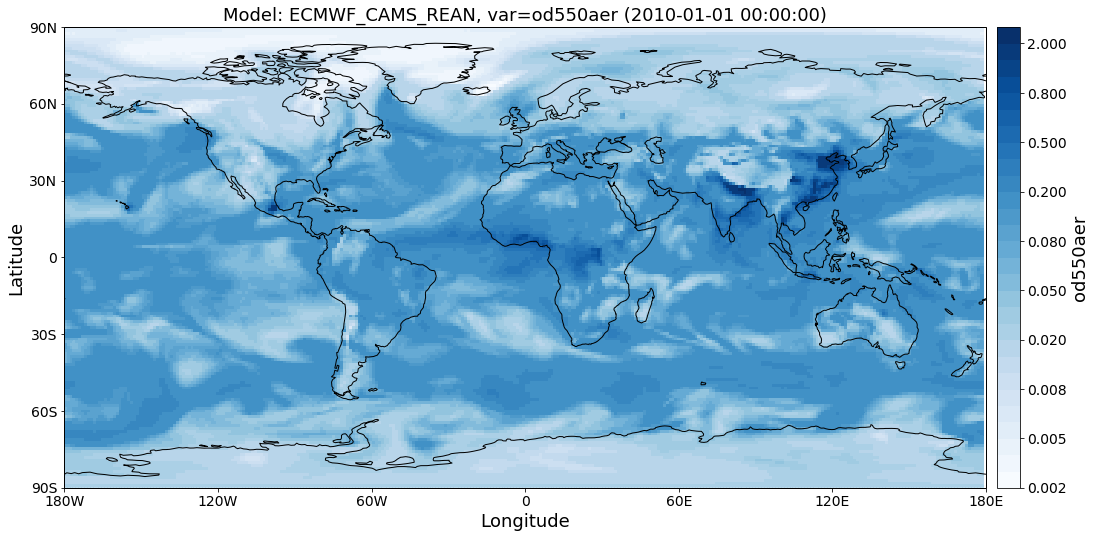

In [4]:
fig = model_data.quickplot_map(time_idx=0)

#### Import of AeroNet Sun V3 data (Level 2)

Import Aeronet data and apply filter that selects only stations that are located at altitudes between 0 and 1000 m.

In [5]:
obs_reader = pya.io.ReadUngridded(OBS_ID, vars_to_retrieve=VAR)
obs_data = obs_reader.read().filter_by_meta(stat_alt=[0, 1000])
print(obs_data)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['od550aer']
Contains instruments: ['sun_photometer']
Total no. of stations: 985
Filters that were applied:
 Filter time log: 20181015180836
	stat_alt: [0, 1000]


#### Now perform collocation and plot corresponding scatter plots with statistical values

##### 2010 monthly World no mountains

In [6]:
data_coloc = pya.colocation.colocate_gridded_ungridded_2D(model_data, obs_data, ts_type='monthly',
                                                          filter_name='WORLD-noMOUNTAINS')
data_coloc

Old name of function colocate_gridded_ungridded(still works)


Interpolating data of shape (12, 161, 320). This may take a while.


Successfully interpolated cube


<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 278)>
array([[[     nan, 0.117588, ...,      nan,      nan],
        [     nan, 0.132128, ...,      nan,      nan],
        ...,
        [0.132236, 0.195057, ...,      nan,      nan],
        [     nan, 0.098409, ...,      nan,      nan]],

       [[0.189948, 0.140062, ..., 0.079353, 0.204337],
        [0.150408, 0.190089, ..., 0.10622 , 0.257806],
        ...,
        [0.159844, 0.178564, ..., 0.054091, 0.239393],
        [0.147172, 0.138039, ..., 0.077916, 0.19986 ]]])
Coordinates:
  * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'ECMWF_CAMS_REAN'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
  * time          (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
  * station_name  (station_name) <U19 'ARM_Darwin' 'ATHENS-NOA' 'Agoufou' ...
    latitude      (station_name) float64 -12.43 37.97 15.35 -9.871 42.02 ...
    longitude     (station_name) float64 130.9 23.72 -1.479 -56.1 -93.7

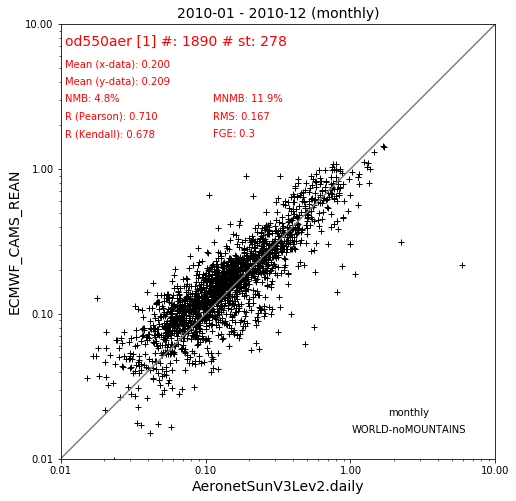

In [7]:
data_coloc.plot_scatter()

##### 2010 daily Europe no mountains

In [8]:
data_coloc = pya.colocation.colocate_gridded_ungridded_2D(model_data, obs_data, ts_type='daily',
                                                             filter_name='EUROPE-noMOUNTAINS')
data_coloc

Old name of function colocate_gridded_ungridded(still works)


Interpolating data of shape (365, 161, 320). This may take a while.


Successfully interpolated cube


<xarray.DataArray 'od550aer' (data_source: 2, time: 365, station_name: 89)>
array([[[0.163447,      nan, ...,      nan,      nan],
        [0.078648,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.086522, 0.015151, ..., 0.075447, 0.03005 ],
        [0.067198, 0.043074, ..., 0.103671, 0.042999],
        ...,
        [0.242585, 0.186407, ..., 0.053797, 0.011344],
        [0.079498, 0.122098, ..., 0.027066, 0.019639]]])
Coordinates:
  * data_source   (data_source) <U22 'AeronetSunV3Lev2.daily' 'ECMWF_CAMS_REAN'
    var_name      (data_source) <U8 'od550aer' 'od550aer'
  * time          (time) datetime64[ns] 2010-01-01 2010-01-02 2010-01-03 ...
  * station_name  (station_name) <U19 'ATHENS-NOA' 'Andenes' 'Arcachon' ...
    latitude      (station_name) float64 37.97 69.28 44.66 45.76 42.0 43.93 ...
    longitude     (station_name) float64 23.72 16.01 -1.163 3.111 -4.6

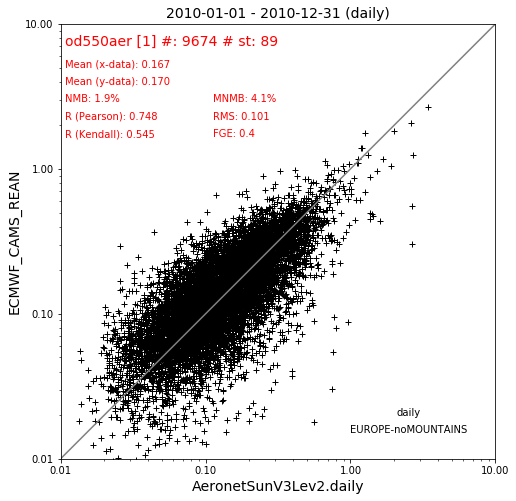

In [9]:
data_coloc.plot_scatter()